In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("data/adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Preprocessing

In [ ]:
# data.custody_status.unique()

In [9]:
# data.manner_of_death[(data.manner_of_death != 'Suicide') &
#                      (data.manner_of_death != 'Natural') &
#                     (data.manner_of_death != 'Accidental') &
#                     (data.manner_of_death != 'Homicide') &
#                     (data.manner_of_death != 'Cannot be Determined')] = "Other"

In [11]:
# data.custody_status[(data.custody_status != 'Sentenced') &
#                      (data.custody_status != 'Awaiting Booking') &
#                     (data.custody_status != 'Booked - Awaiting Trial') &
#                     (data.custody_status != 'Booked - No Charges Filed')] = "Other"

In [10]:
# data.race[(data.race != 'White') &
#                      (data.race != 'Hispanic') &
#                     (data.race != 'Black')] = "Other"

In [12]:
data.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [13]:
# data = data[data.age != 'Unk']
data.age = data.age.astype(int)

In [14]:
# data.manner_of_death.unique()

In [15]:
# data.custody_status.unique()

In [16]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

### Categorize age in to age_groups

In [17]:
data['age_group'] = pd.Series(data.age)
data['age_group'][(data.age >= 17) & (data.age < 35)] = "Young Adult"
data['age_group'][(data.age >= 35) & (data.age < 65)] = "Middle Aged"
data['age_group'][data.age >= 65] = "Senior"

/Users/rahal/opt/anaconda3/envs/credit-card-fraud-detection/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data.age_group.unique()

array(['Young Adult', 'Middle Aged', 'Senior'], dtype=object)

### Categorize education in to education_groups

In [48]:
# Education level
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [64]:
#  Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad 
# < Prof-school < Assoc-acdm < Assoc-voc < Some-college 
# < Bachelors < Masters < Doctorate.

In [54]:
data['education_group'] = pd.Series(data.education)

data['education_group'][
    (data.education == 'Preschool') |
    (data.education == '1st-4th') |
    (data.education == '5th-6th') |
    (data.education == '7th-8th') |
    (data.education == '9th') |
    (data.education == '10th') |
    (data.education == '11th') |
    (data.education == '12th') |
    (data.education == 'HS-grad')
] = "School"

data['education_group'][
    (data.education == 'Prof-school') |
    (data.education == 'Assoc-acdm') |
    (data.education == 'Assoc-voc') |
    (data.education == 'Some-college')
] = "College"

data['education_group'][
    (data.education == 'Bachelors')
] = "Undergraduate"

data['education_group'][
    (data.education == 'Masters')
] = "Masters"

data['education_group'][
    (data.education == 'Doctorate')
] = "Doctorate"

/Users/rahal/opt/anaconda3/envs/credit-card-fraud-detection/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rahal/opt/anaconda3/envs/credit-card-fraud-detection/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rahal/opt/anaconda3/envs/credit-card-fraud-detection/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [66]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group', 'education_group'],
      dtype='object')

### Rename Class Members

In [70]:
# Asian-Pac-Islander -> Asian
# Amer-Indian-Eskimo -> Native American

In [71]:
data['race'][
    (data.race == 'Asian-Pac-Islander')
] = "Asian"

data['race'][
    (data.race == 'Amer-Indian-Eskimo')
] = "Native American"

/Users/rahal/opt/anaconda3/envs/credit-card-fraud-detection/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rahal/opt/anaconda3/envs/credit-card-fraud-detection/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [72]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,education_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young Adult,School
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Middle Aged,School
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Young Adult,College
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Middle Aged,College
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,Young Adult,College


In [73]:
# data.describe()

In [74]:
# data.corr()

In [75]:
# data.columns

In [76]:
# data[data.custody_status=='Sentenced']

##  Step 2.3: Compute the frequency

In [77]:
data.value_counts(["gender"]).sort_index()

gender
Female    16192
Male      32650
dtype: int64

In [78]:
data.value_counts(["age_group"]).sort_index()

age_group  
Middle Aged    25746
Senior          2087
Young Adult    21009
dtype: int64

In [79]:
data.value_counts(["race"]).sort_index()

race           
Asian               1519
Black               4685
Native American      470
Other                406
White              41762
dtype: int64

## Section 2.4: histograms

###   Gender - Income

Text(0.5, 1.0, 'Fig 1.1: Histogram - Dependent: Income | Protected: Gender')

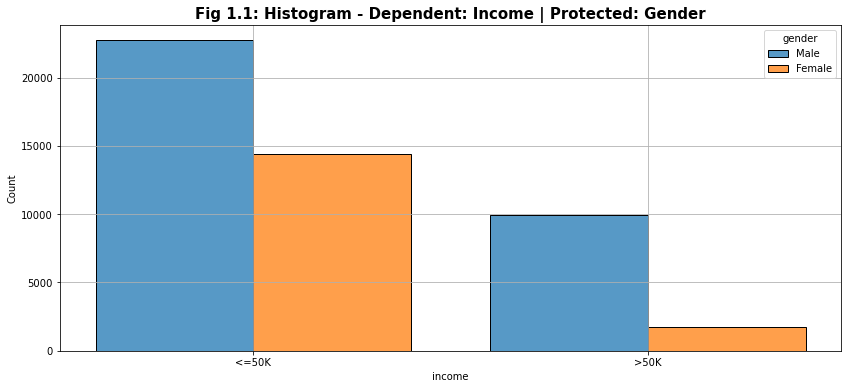

In [80]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue="gender", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.1: Histogram - Dependent: Income | Protected: Gender', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


###   Gender - Education level

Text(0.5, 1.0, 'Fig 1.2: Histogram - Dependent: Education Level | Protected: Gender')

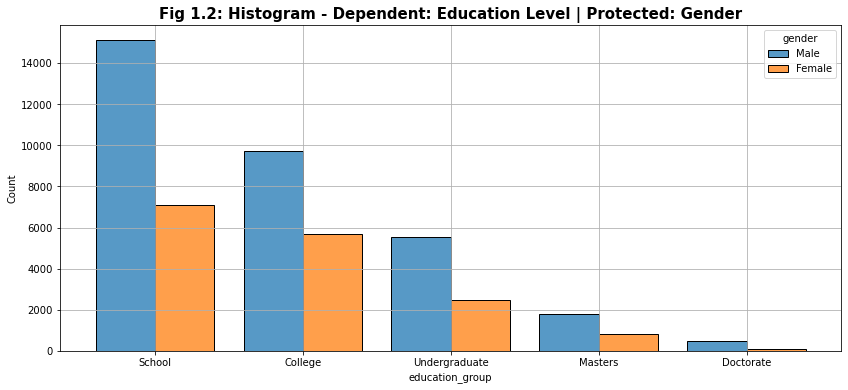

In [81]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="education_group", hue="gender", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.2: Histogram - Dependent: Education Level | Protected: Gender', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


In [82]:
# data.value_counts(["race", "manner_of_death"]).sort_index()

### Race - Income

Text(0.5, 1.0, 'Fig 1.3: Histogram - Dependent: Income | Protected: Race')

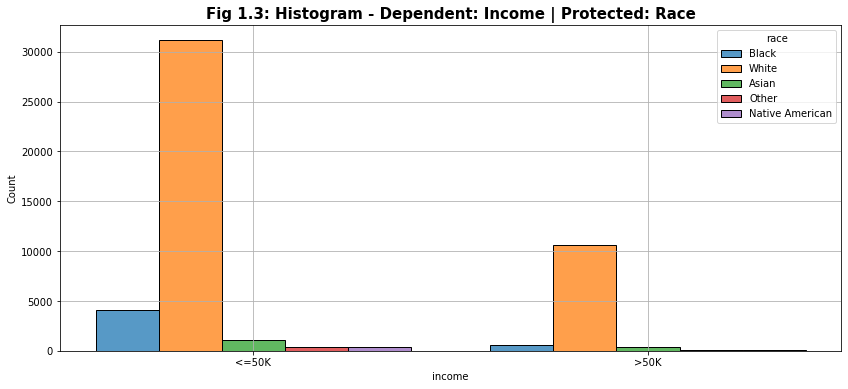

In [83]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue="race", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.3: Histogram - Dependent: Income | Protected: Race', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


### Race - Education Level

Text(0.5, 1.0, 'Fig 1.4: Histogram - Dependent: Education Level | Protected: Race')

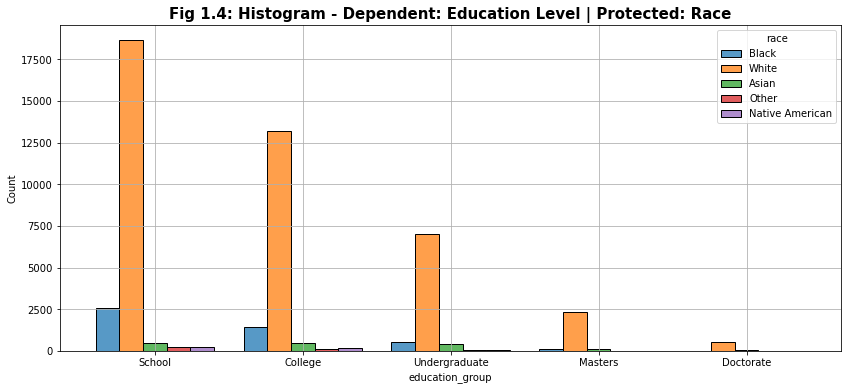

In [85]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="education_group", hue="race", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.4: Histogram - Dependent: Education Level | Protected: Race', fontdict={'fontsize': 15, 'fontweight': 'heavy'})

### Age - Income

Text(0.5, 1.0, 'Fig 1.5: Histogram - Dependent: Income | Protected: Age')

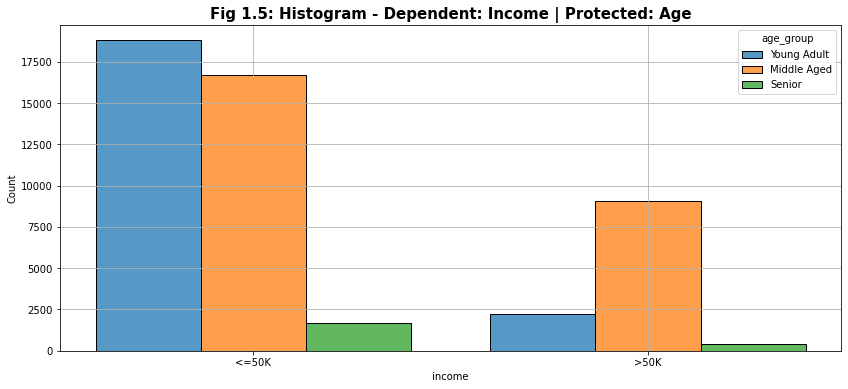

In [86]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue="age_group", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.5: Histogram - Dependent: Income | Protected: Age', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


### Age  - Education Level

Text(0.5, 1.0, 'Fig 1.6: Histogram - Dependent: Education Level | Protected: Age')

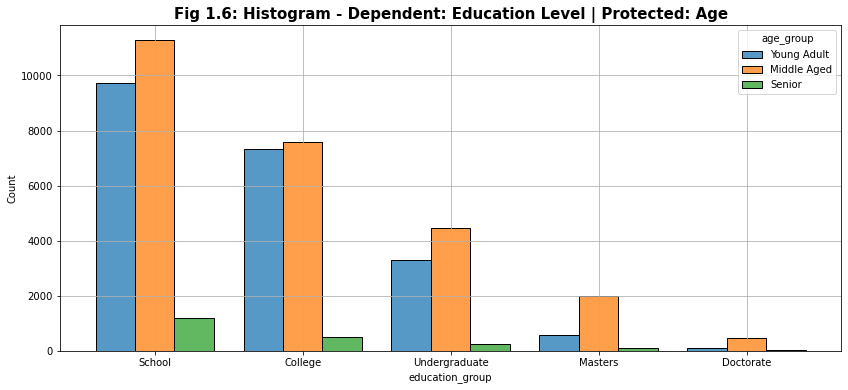

In [87]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="education_group", hue="age_group", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.6: Histogram - Dependent: Education Level | Protected: Age', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


# Custody Status

## Gender

In [26]:
data.value_counts(["gender", "custody_status"]).sort_index()

gender  custody_status           
Female  Awaiting Booking               15
        Booked - Awaiting Trial       106
        Booked - No Charges Filed      32
        Other                          84
        Sentenced                     234
Male    Awaiting Booking               82
        Booked - Awaiting Trial       925
        Booked - No Charges Filed     171
        Other                        1762
        Sentenced                    4961
dtype: int64

Text(0.5,1,'Fig 2.2: Histogram - Dependent: Custody Status | Protected: Gender')

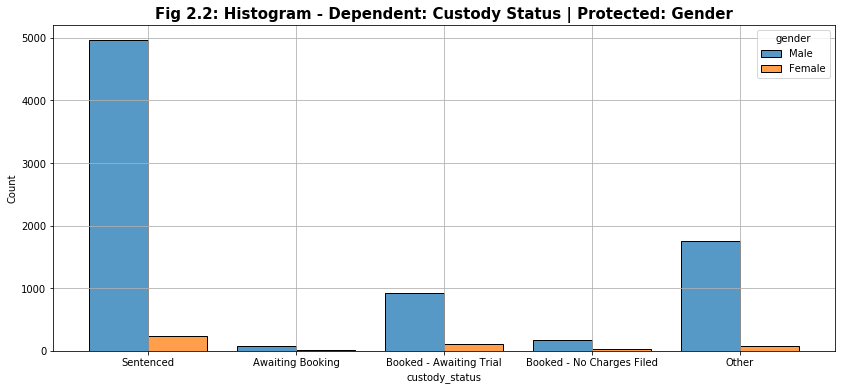

In [74]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="custody_status", hue="gender", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 2.2: Histogram - Dependent: Custody Status | Protected: Gender', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


## Race

In [22]:
data.value_counts(["race", "custody_status"]).sort_index()

race      custody_status           
Black     Awaiting Booking               20
          Booked - Awaiting Trial       211
          Booked - No Charges Filed      43
          Other                         382
          Sentenced                    1316
Hispanic  Awaiting Booking               31
          Booked - Awaiting Trial       286
          Booked - No Charges Filed      54
          Other                         757
          Sentenced                    1365
Other     Awaiting Booking                1
          Booked - Awaiting Trial        63
          Booked - No Charges Filed      14
          Other                         124
          Sentenced                     265
White     Awaiting Booking               45
          Booked - Awaiting Trial       471
          Booked - No Charges Filed      92
          Other                         583
          Sentenced                    2249
dtype: int64

Text(0.5,1,'Fig 2.1: Histogram - Dependent: Custody Status | Protected: Race')

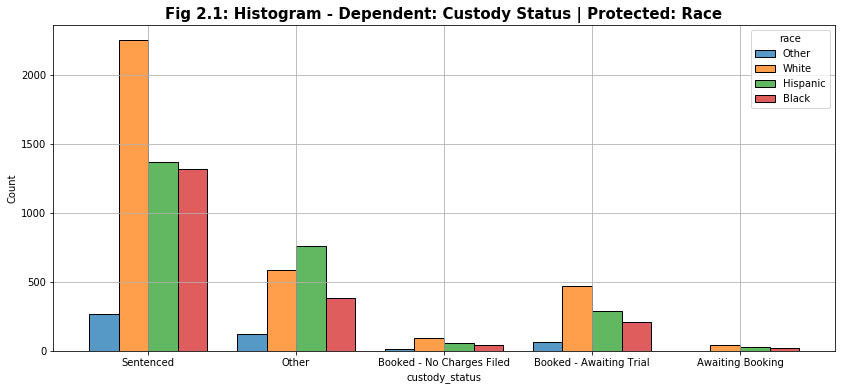

In [73]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data.sort_values(by = "custody_status", ascending=False), x="custody_status", hue="race", multiple="dodge", shrink=.8, ax =ax, hue_order=["Other", "White", "Hispanic","Black"])
plt.grid()
plt.title('Fig 2.1: Histogram - Dependent: Custody Status | Protected: Race', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


## Age

In [32]:
data.value_counts(["age_group", "custody_status"]).sort_index()

age_group    custody_status           
Juvenile     Booked - Awaiting Trial         1
             Booked - No Charges Filed       1
             Other                          42
             Sentenced                       8
Middle Aged  Awaiting Booking               64
             Booked - Awaiting Trial       692
             Booked - No Charges Filed     138
             Other                         834
             Sentenced                    3555
Senior       Awaiting Booking                4
             Booked - Awaiting Trial        86
             Booked - No Charges Filed       5
             Other                          59
             Sentenced                    1144
Young Adult  Awaiting Booking               29
             Booked - Awaiting Trial       252
             Booked - No Charges Filed      59
             Other                         911
             Sentenced                     488
dtype: int64

Text(0.5,1,'Fig 2.3: Histogram - Dependent: Custody Status | Protected: Age')

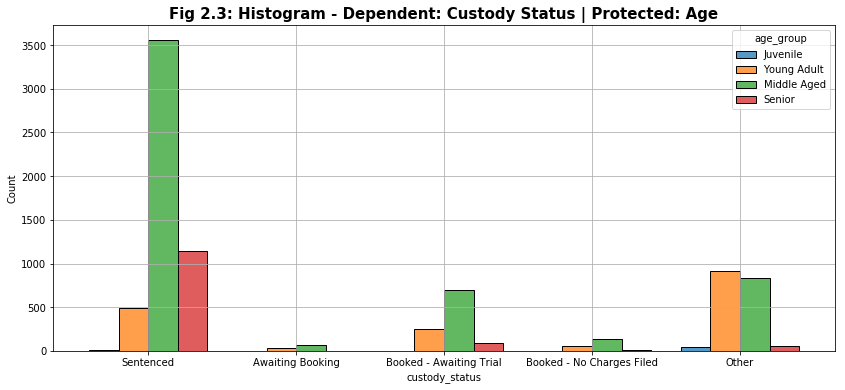

In [75]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="custody_status", hue="age_group", multiple="dodge", shrink=.8, ax =ax, hue_order = ["Juvenile", "Young Adult", "Middle Aged", "Senior"])
plt.grid()
plt.title('Fig 2.3: Histogram - Dependent: Custody Status | Protected: Age', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


In [182]:
data_hyp = data[data.manner_of_death == "Suicide"]

In [183]:
data_hyp

,manner_of_death,custody_status,race,age,gender,age_group
0,Suicide,Sentenced,Other,35,Male,Middle Aged
8,Suicide,Sentenced,Hispanic,38,Male,Middle Aged
22,Suicide,Sentenced,Hispanic,23,Male,Young Adult
29,Suicide,Sentenced,White,39,Male,Middle Aged
30,Suicide,Booked - Awaiting Trial,White,33,Male,Young Adult
...,...,...,...,...,...,...
8317,Suicide,Sentenced,Black,40,Male,Middle Aged
8330,Suicide,Sentenced,Hispanic,37,Male,Middle Aged
8331,Suicide,Sentenced,White,35,Male,Middle Aged
8347,Suicide,Sentenced,Hispanic,44,Male,Middle Aged


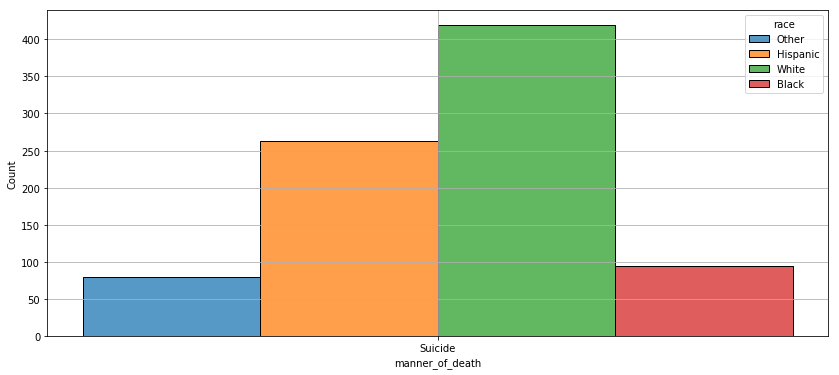

In [184]:
fig, ax = plt.subplots(figsize=(14,6))

g=sns.histplot(data=data_hyp, x="manner_of_death", hue="race", multiple="dodge", shrink=.8, ax =ax)
plt.grid()

In [185]:
data_hyp_fair = pd.DataFrame(data_hyp)
data_hyp_fair["percentage_"]

KeyError: 'percentage_'

In [81]:
percentage = {}

for race in data_hyp.race.unique():
    percentage[race] = data[(data.manner_of_death == "Homicide") & (data.race == race)].shape[0]/data[data.race == race].shape[0]*100

percentage

{'Other': 22.739018087855296,
 'Hispanic': 25.872442839951866,
 'White': 13.604651162790699,
 'Black': 14.908722109533468,
 'American Indian': 11.25}

In [61]:
percentage = {}

for age_group in data.age_group.unique():
    percentage[age_group] = data[(data.manner_of_death == "Homicide") & (data.age_group == age_group)].shape[0]/data[data.age_group == age_group].shape[0]*100

percentage

{'Middle Aged': 12.757902706795383,
 'Senior': 3.00462249614792,
 'Young Adult': 43.53076480736055,
 'Juvenile': 65.38461538461539}

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data_hyp, x="manner_of_death", hue="race", multiple="dodge", shrink=.8, ax =ax)
plt.grid()

In [58]:
keys = list(percentage.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(percentage[k][:-1]) for k in keys]
sns.barplot(x=keys, y=vals)

TypeError: 'float' object is not subscriptable

[(0, 30)]

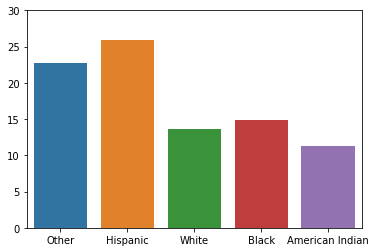

In [86]:
my_dict = {'Southampton': '33.7%', 'Cherbourg': '55.36%', 'Queenstown': '38.96%'}
perc =  [float(i) for i in percentage.values()]
g=sns.barplot(x=list(percentage.keys()),y=perc)
g.set(ylim=(0,30))
#g.set_yscale("log")

In [73]:
perc

dict_values([12.757902706795383, 3.00462249614792, 43.53076480736055, 65.38461538461539])

In [67]:
perc

[33.7, 55.36, 38.96]

[(0, 4000)]

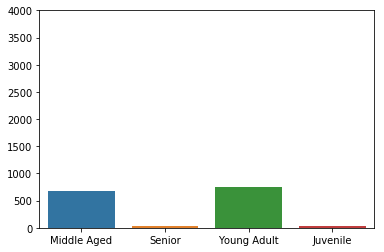

In [104]:
homicide_age = {}

for age_group in data.age_group.unique():
    homicide_age[age_group] = data[(data.manner_of_death == "Homicide") & (data.age_group == age_group)].shape[0]

homicide
    
homicide_age
perc =  [float(i) for i in homicide_age.values()]
g=sns.barplot(x=list(homicide_age.keys()),y=perc)
g.set(ylim=(0,4000))

In [35]:
sentenced_race = {}

for race in data.race.unique():
    sentenced_race[race] = data[(data.custody_status == "Sentenced") & (data.race == race)].shape[0]


# del sentenced_race['Other']
    
sentenced_race
perc =  [float(i) for i in sentenced_race.values()]


In [36]:
sentenced_race

{'Other': 265, 'White': 2249, 'Hispanic': 1365, 'Black': 1316}

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


[(265.0, 1000000000000000)]

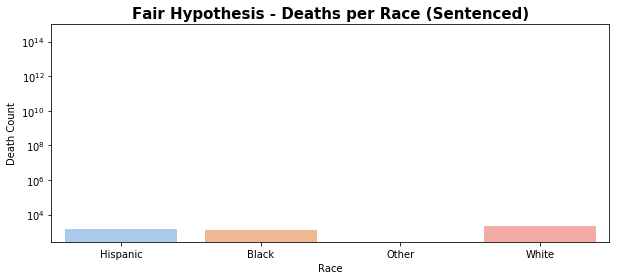

In [41]:
fig, ax = plt.subplots(figsize=(10,4))
#, colors = ["green", "red", "orange", "yellow"]
g=sns.barplot(x=list(sentenced_race.keys()),y=perc, ax = ax, order=["Hispanic", "Black", "Other", "White"], palette= "pastel")

g.set_yscale("log")
plt.ylabel("Death Count")
plt.xlabel("Race")
plt.title('Fair Hypothesis - Deaths per Race (Sentenced)', fontdict={'fontsize': 15, 'fontweight': 'heavy'})
g.set(ylim=(0,1000000000000000))

Text(0.5,1,'Bias Hypothesis - Deaths during per Race (Sentenced)')

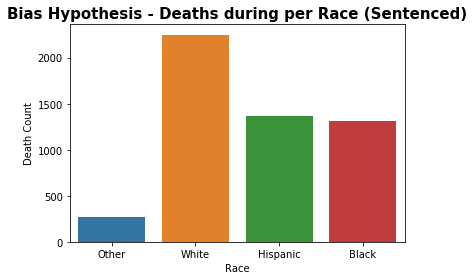

In [40]:
g=sns.barplot(x=list(sentenced_race.keys()),y=perc)
plt.ylabel("Death Count")
plt.xlabel("Race")
plt.title('Bias Hypothesis - Deaths during per Race (Sentenced)', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


In [200]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Step 5

In [42]:
da_

NameError: name 'da_' is not defined

In [43]:
data_step5 = pd.DataFrame(data)
data_step5["custody_status_num"] = 0
data_step5["custody_status_num"][(data_step5.custody_status == 'Sentenced')] = 0
data_step5["custody_status_num"][(data_step5.custody_status == 'Awaiting Booking')] = 1
data_step5["custody_status_num"][(data_step5.custody_status == 'Booked - Awaiting Trial')] = 2
data_step5["custody_status_num"][(data_step5.custody_status == 'Booked - No Charges Filed')] = 3
data_step5["custody_status_num"][(data_step5.custody_status == 'Other')] = 4

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [44]:
data_step5.value_counts(["custody_status"])

custody_status           
Sentenced                    5195
Other                        1846
Booked - Awaiting Trial      1031
Booked - No Charges Filed     203
Awaiting Booking               97
dtype: int64

In [45]:
data_step5.custody_status.unique()

array(['Sentenced', 'Awaiting Booking', 'Booked - Awaiting Trial',
       'Booked - No Charges Filed', 'Other'], dtype=object)

In [46]:
data_step5.custody_status_num.unique()

array([0, 1, 2, 3, 4])

In [47]:
data_step5["race_num"] = 0
data_step5["race_num"][(data_step5.race == 'White')] = 0
data_step5["race_num"][(data_step5.race == 'Hispanic')] = 1
data_step5["race_num"][(data_step5.race == 'Black')] = 2
data_step5["race_num"][(data_step5.race == 'Other')] = 3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [48]:
data_step5.race.unique()

array(['Other', 'White', 'Hispanic', 'Black'], dtype=object)

In [222]:
data_step5.race_num.unique()

array([3, 0, 1, 2])

In [219]:
data_step5.value_counts(["race"])

race    
White       3440
Hispanic    2493
Black       1972
Other        467
dtype: int64

In [225]:
data_step5[["custody_status_num", "race_num"]].mean()

custody_status_num    1.212613
race_num              0.936216
dtype: float64

In [226]:
data_step5[["custody_status_num", "race_num"]].median()

custody_status_num    0.0
race_num              1.0
dtype: float64

In [227]:
data_step5[["custody_status_num", "race_num"]].mode()

,custody_status_num,race_num
0,0,0


In [49]:
data_step5_sample = data_step5.sample(frac=0.5, random_state=1)

In [234]:
data_step5_sample[["custody_status_num", "race_num"]].mean()

custody_status_num    1.209030
race_num              0.940038
dtype: float64

In [235]:
data_step5_sample[["custody_status_num", "race_num"]].median()

custody_status_num    0.0
race_num              1.0
dtype: float64

In [236]:
data_step5_sample[["custody_status_num", "race_num"]].mode()

,custody_status_num,race_num
0,0,0


In [61]:
data[data.custody_status=="Sentenced"].shape

(5195, 8)

In [62]:
data_step5_sample[data_step5_sample.custody_status=="Sentenced"].shape

(2605, 8)

In [56]:
data.value_counts(["race", "custody_status"]).sort_index()/8372*100

race      custody_status           
Black     Awaiting Booking              0.238892
          Booked - Awaiting Trial       2.520306
          Booked - No Charges Filed     0.513617
          Other                         4.562828
          Sentenced                    15.719064
Hispanic  Awaiting Booking              0.370282
          Booked - Awaiting Trial       3.416149
          Booked - No Charges Filed     0.645007
          Other                         9.042045
          Sentenced                    16.304348
Other     Awaiting Booking              0.011945
          Booked - Awaiting Trial       0.752508
          Booked - No Charges Filed     0.167224
          Other                         1.481128
          Sentenced                     3.165313
White     Awaiting Booking              0.537506
          Booked - Awaiting Trial       5.625896
          Booked - No Charges Filed     1.098901
          Other                         6.963688
          Sentenced              

In [58]:
data_step5_sample.value_counts(["race", "custody_status"]).sort_index()/4186*100

race      custody_status           
Black     Awaiting Booking               11
          Booked - Awaiting Trial       108
          Booked - No Charges Filed      22
          Other                         200
          Sentenced                     656
Hispanic  Awaiting Booking               16
          Booked - Awaiting Trial       140
          Booked - No Charges Filed      24
          Other                         371
          Sentenced                     709
Other     Booked - Awaiting Trial        33
          Booked - No Charges Filed       8
          Other                          65
          Sentenced                     121
White     Awaiting Booking               16
          Booked - Awaiting Trial       235
          Booked - No Charges Filed      48
          Other                         284
          Sentenced                    1119
dtype: int64

In [59]:
data.value_counts(["race", "custody_status"]).sort_index()/8372*100 - data_step5_sample.value_counts(["race", "custody_status"]).sort_index()/4186*100

race      custody_status           
Black     Awaiting Booking            -0.023889
          Booked - Awaiting Trial     -0.059723
          Booked - No Charges Filed   -0.011945
          Other                       -0.215002
          Sentenced                    0.047778
Hispanic  Awaiting Booking            -0.011945
          Booked - Awaiting Trial      0.071667
          Booked - No Charges Filed    0.071667
          Other                        0.179169
          Sentenced                   -0.633063
Other     Awaiting Booking                  NaN
          Booked - Awaiting Trial     -0.035834
          Booked - No Charges Filed   -0.023889
          Other                       -0.071667
          Sentenced                    0.274725
White     Awaiting Booking             0.155280
          Booked - Awaiting Trial      0.011945
          Booked - No Charges Filed   -0.047778
          Other                        0.179169
          Sentenced                    0.131390
dtyp

Text(0.5,1,'Custody Status - Race (Reduced Sample)')

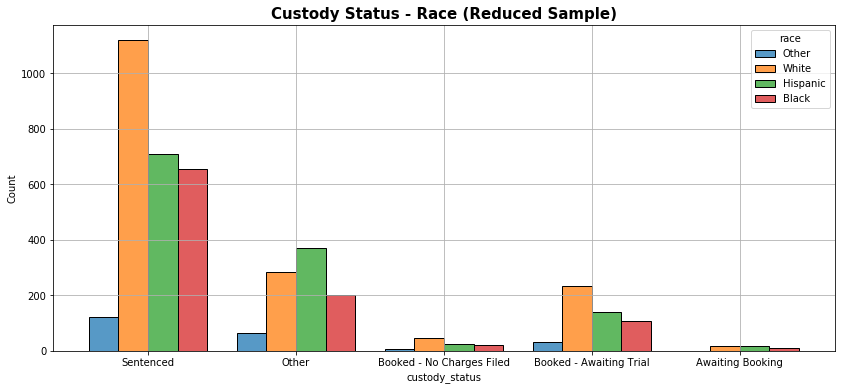

In [63]:
data_step5_sample = data_step5.sample(frac=0.5, random_state=1).sort_values(by = "custody_status", ascending=False)
fig, ax = plt.subplots(figsize=(14,6))
#  order=['Sentenced', 'Awaiting Booking', 'Booked - Awaiting Trial',       'Booked - No Charges Filed', 'Other']
g=sns.histplot(data=data_step5_sample, x="custody_status", hue="race", multiple="dodge", shrink=.8, ax =ax,hue_order=["Other", "White", "Hispanic","Black"])
plt.grid()
plt.title('Custody Status - Race (Reduced Sample)', fontdict={'fontsize': 15, 'fontweight': 'heavy'})
# g.set_xticklabels(['Sentenced', 'Awaiting Booking', 'Booked - Awaiting Trial','Booked - No Charges Filed', 'Other'])

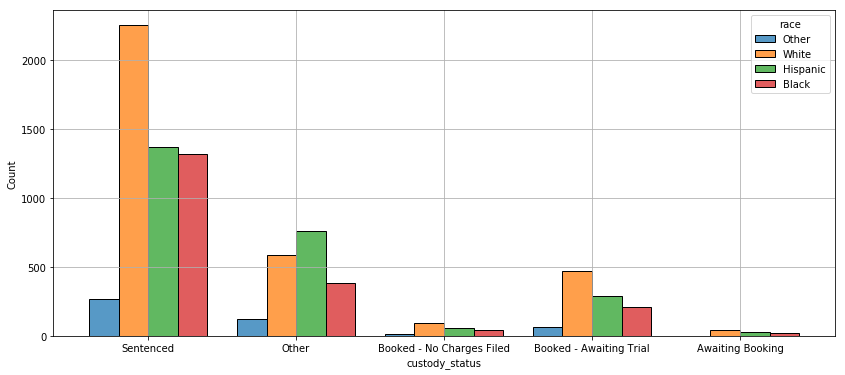

In [293]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data_step5.sort_values(by = "custody_status", ascending=False), x="custody_status", hue="race", multiple="dodge",hue_order=["Other", "White", "Hispanic","Black"], shrink=.8, ax =ax)
plt.grid()

In [50]:
data_step5_sample.shape

(4186, 8)

In [51]:
data_step5.shape

(8372, 8)